In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

import glob

In [2]:
%matplotlib notebook

In [3]:
# meta data
z = 0.0094
tb_max = 58863.34
t_fl = -17.4928

In [4]:
def plot_box_spec(wave, flux): 
    flux_plot = np.repeat(flux, 2)
    wv_plot = wave.copy()
    wv_plot[:-1] += np.diff(wave)/2
    wv_plot = np.append(wave[0]-(wave[1]-wave[0])/2, 
                        np.append(np.repeat(wv_plot[0:-1], 2), 
                                  wave[-1]+(wave[-1]-wave[-2])/2))
    
    return wv_plot, flux_plot

## Maximum Light

<IPython.core.display.Javascript object>


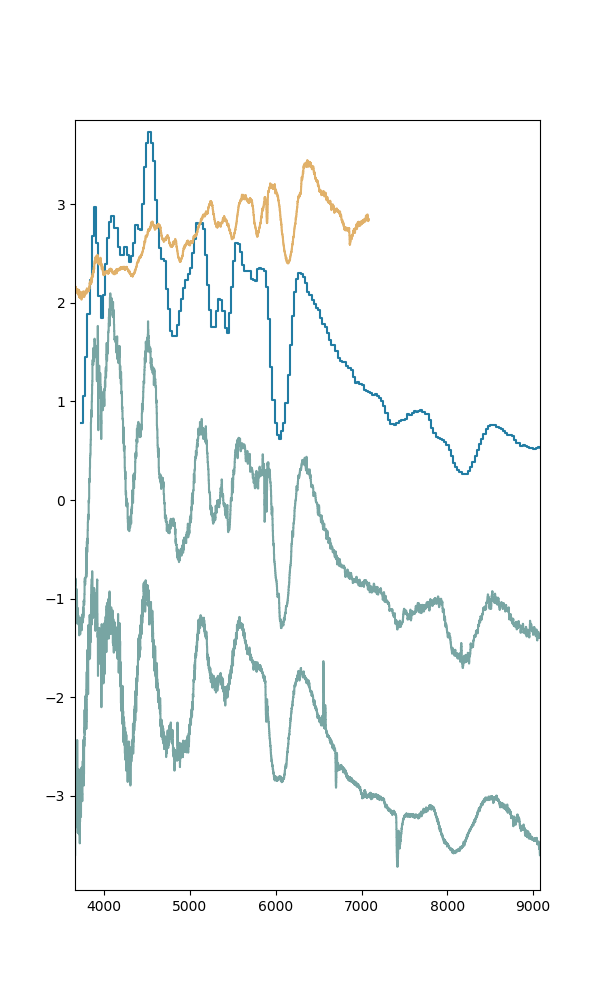

/Users/adamamiller/miniconda3/envs/emcee3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/adamamiller/miniconda3/envs/emcee3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [35]:
#19yvq
spec = '../data/spectra/ZTF19adcecwu_20200115_P60_v1.ascii'

comp_dir = '../data/comp_sne/'
#02bo
spec_02bo = comp_dir + 'SN2002bo_2002-03-22_04-00-29_Lick-3m_KAST_BSNIP.flm' # Silverman+12
z_02bo = 0.00424
phase_02bo = (52355.167 - 52356.0)/(1+z_02bo)

#10ygu
spec_10ygu = comp_dir + 'PTF10ygu_Gemini_phase_0.2.txt'  # Maguire+14
z_10ygu = 0.025047
phase_10ygu = 0.2

#86G
spec_86G = comp_dir + '1986G_1986-05-11_00-00-00_ESO-1.5m_BC-ESO_SUSPECT.dat' # Cristiani+1992
z_86G = 0.0018
phase_86G = 0.0


aam_colors = {'mustard': "#E29930",
             'blue': "#217CA3",
             'asphalt': "#32384D",
             'navy': "#444C5C",
             'punch': "#CE5A57",
             'ocean': "#78A5A3",
             'warm': "#E1B16A",}

fig, ax = plt.subplots(figsize=(6,10))

spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)

wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
norm_flux = np.median(fl[np.where((wv > 7200) & (wv < 7400))])

ax.plot(wv/(1+z), fl/norm_flux, color=aam_colors['blue'])

spec_02bo_df = pd.read_csv(spec_02bo, comment='#', delim_whitespace=True, header=None)
wv_02bo, fl_02bo = plot_box_spec(spec_02bo_df[0].values, spec_02bo_df[1].values)
norm_flux = np.median(fl_02bo[np.where((wv_02bo > 7200) & (wv_02bo < 7400))])
ax.plot(wv_02bo/(1+z_02bo), fl_02bo/norm_flux - 2, color=aam_colors['ocean'])

spec_10ygu_df = pd.read_csv(spec_10ygu, comment='#', delim_whitespace=True, header=None)
wv_10ygu, fl_10ygu = plot_box_spec(spec_10ygu_df[0].values, spec_10ygu_df[1].values)
norm_flux = np.median(fl_10ygu[np.where((wv_10ygu > 7200) & (wv_10ygu < 7400))])
plot_region = np.where(wv_10ygu > 3600)
ax.plot(wv_10ygu[plot_region]/(1+z_10ygu), fl_10ygu[plot_region]/norm_flux - 4, color=aam_colors['ocean'])

spec_86G_df = pd.read_csv(spec_86G, comment='#', delim_whitespace=True, header=None)
wv_86G, fl_86G = plot_box_spec(spec_86G_df[0].values.astype(float), spec_86G_df[1].values)
norm_flux = np.median(fl_86G[np.where((wv_86G > 7200) & (wv_86G < 7400))])
plot_region = np.where(wv_86G > 3600)
ax.plot(wv_86G[plot_region]/(1+z_86G), fl_86G[plot_region]/8e-14 + 2, color=aam_colors['warm'])

<IPython.core.display.Javascript object>


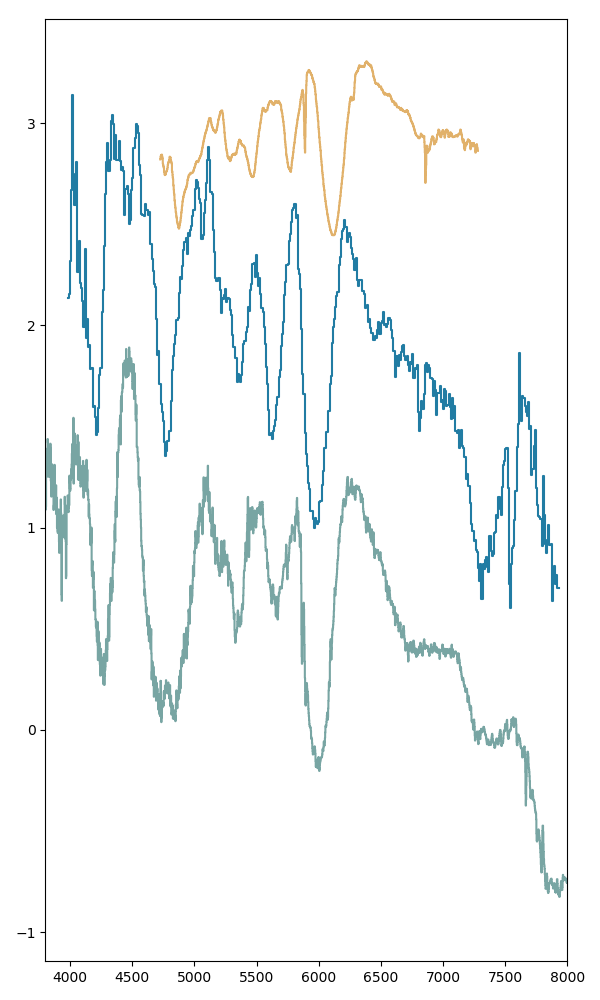

In [56]:
#19yvq
spec = '../data/spectra/ZTF19adcecwu_20200103_LT_v1.ascii'

comp_dir = '../data/comp_sne/'
#02bo
spec_02bo = comp_dir + 'SN2002bo_2002-03-11_06-14-24_Lick-3m_KAST_BSNIP.flm' # Silverman+12
z_02bo = 0.00424
phase_02bo = (52344.260 - 52356.0)/(1+z_02bo)

#10ygu
spec_10ygu = comp_dir + 'PTF10ygu_Gemini_phase_0.2.txt'
z_10ygu = 0.025047
phase_10ygu = 0.2

#86G
spec_86G = comp_dir + '1986G_1986-05-07_04-48-00_ESO-1.5m_BC-ESO_SUSPECT.dat' # Cristiani+1992
z_86G = 0.0018
phase_86G = 3.8

#04dt
spec_04dt = comp_dir + '2004dt_2004-08-13_00-00-00_Other_Other_CCCP.dat' # Altavilla+07
z_04dt = 0.01973
phase_04dt = -8.7


aam_colors = {'mustard': "#E29930",
             'blue': "#217CA3",
             'asphalt': "#32384D",
             'navy': "#444C5C",
             'punch': "#CE5A57",
             'ocean': "#78A5A3",
             'warm': "#E1B16A",}

fig, ax = plt.subplots(figsize=(6,10))

spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)

wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
norm_flux = np.median(fl[np.where((wv > 7200) & (wv < 7400))])

ax.plot(wv/(1+z), fl/norm_flux, color=aam_colors['blue'])

spec_02bo_df = pd.read_csv(spec_02bo, comment='#', delim_whitespace=True, header=None)
wv_02bo, fl_02bo = plot_box_spec(spec_02bo_df[0].values, spec_02bo_df[1].values)
norm_flux = np.median(fl_02bo[np.where((wv_02bo > 7200) & (wv_02bo < 7400))])
ax.plot(wv_02bo/(1+z_02bo), fl_02bo/norm_flux - 1, color=aam_colors['ocean'])

# spec_04dt_df = pd.read_csv(spec_04dt, comment='#', delim_whitespace=True, header=None)
# wv_04dt, fl_04dt = plot_box_spec(spec_04dt_df[0].values, spec_04dt_df[1].values)
# norm_flux = np.median(fl_04dt[np.where((wv_04dt > 7200) & (wv_04dt < 7400))])
# plot_region = np.where(wv_04dt > 3600)
# ax.plot(wv_04dt/(1+z_04dt), fl_04dt/norm_flux - 10, color=aam_colors['ocean'])

# spec_10ygu_df = pd.read_csv(spec_10ygu, comment='#', delim_whitespace=True, header=None)
# wv_10ygu, fl_10ygu = plot_box_spec(spec_10ygu_df[0].values, spec_10ygu_df[1].values)
# norm_flux = np.median(fl_10ygu[np.where((wv_10ygu > 7200) & (wv_10ygu < 7400))])
# plot_region = np.where(wv_10ygu > 3600)
# ax.plot(wv_10ygu[plot_region]/(1+z_10ygu), fl_10ygu[plot_region]/norm_flux - 4, color=aam_colors['ocean'])

spec_86G_df = pd.read_csv(spec_86G, comment='#', delim_whitespace=True, header=None)
wv_86G, fl_86G = plot_box_spec(spec_86G_df[0].values.astype(float), spec_86G_df[1].values)
norm_flux = np.median(fl_86G[np.where((wv_86G > 7200) & (wv_86G < 7400))])
plot_region = np.where(wv_86G > 3600)
ax.plot(wv_86G[plot_region]/(1+z_86G), fl_86G[plot_region]/8e-14 + 2, color=aam_colors['warm'])


ax.set_xlim(3800,8000)
# ax.set_ylim(-100,10)
fig.tight_layout()

<IPython.core.display.Javascript object>


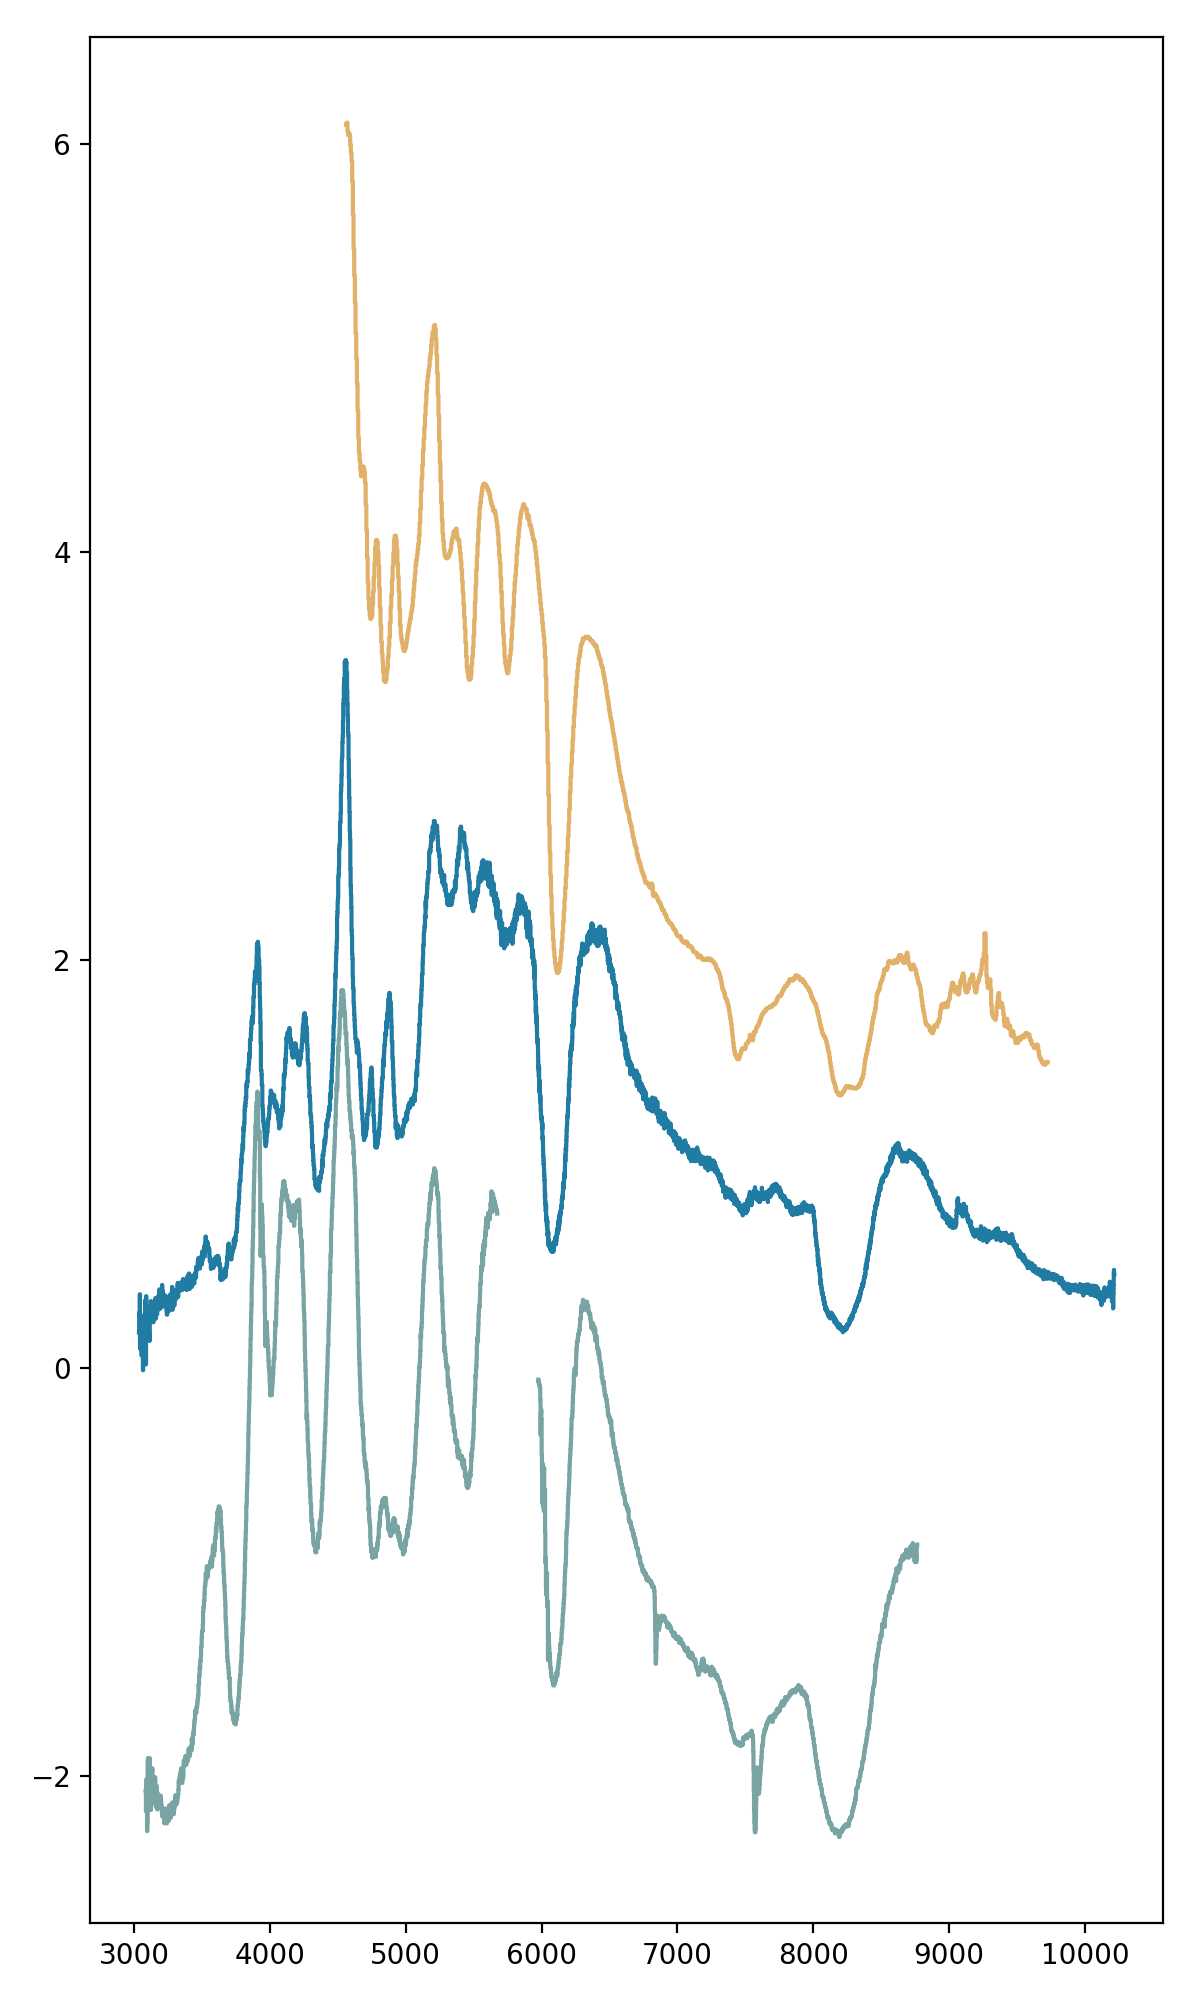

In [76]:
#19yvq
spec = '../data/spectra/ZTF19adcecwu_20200124_Keck1_v1.ascii'

comp_dir = '../data/comp_sne/'
#02bo
spec_02bo = comp_dir + '2002bo_2002-03-28_00-00-00_WHT-4.2m_ISIS_SUSPECT.dat' # Silverman+12
z_02bo = 0.00424
phase_02bo = 5.9

#10ygu
spec_10ygu = comp_dir + 'PTF10ygu_Gemini_phase_0.2.txt'
z_10ygu = 0.025047
phase_10ygu = 0.2

#86G
spec_86G = comp_dir + '1986G_1986-05-07_04-48-00_ESO-1.5m_BC-ESO_SUSPECT.dat' # Cristiani+1992
z_86G = 0.0018
phase_86G = 3.8

#05am
spec_05am =  comp_dir + 'SN2005am_2005-03-13_05-21-07_Lick-3m_KAST_BSNIP.flm' # Silverman+12
z_05am = 0.007899
phase_05am = (53442.222 - 53435.645)/(1+z_05am)

aam_colors = {'mustard': "#E29930",
             'blue': "#217CA3",
             'asphalt': "#32384D",
             'navy': "#444C5C",
             'punch': "#CE5A57",
             'ocean': "#78A5A3",
             'warm': "#E1B16A",}

fig, ax = plt.subplots(figsize=(6,10))

spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)

wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
norm_flux = np.median(fl[np.where((wv > 7200) & (wv < 7400))])

ax.plot(wv/(1+z), fl/norm_flux, color=aam_colors['blue'])

spec_02bo_df = pd.read_csv(spec_02bo, comment='#', delim_whitespace=True, header=None)
wv_02bo, fl_02bo = plot_box_spec(spec_02bo_df[0].values, spec_02bo_df[1].values)
norm_flux = np.median(fl_02bo[np.where((wv_02bo > 7200) & (wv_02bo < 7400))])
plot_blue = np.where(wv_02bo < 5700)
ax.plot(wv_02bo[plot_blue]/(1+z_02bo), fl_02bo[plot_blue]/norm_flux - 2.5, color=aam_colors['ocean'])
plot_red = np.where(wv_02bo > 6000)
ax.plot(wv_02bo[plot_red]/(1+z_02bo), fl_02bo[plot_red]/norm_flux - 2.5, color=aam_colors['ocean'])

spec_05am_df = pd.read_csv(spec_05am, comment='#', delim_whitespace=True, header=None)
wv_05am, fl_05am = plot_box_spec(spec_05am_df[0].values, spec_05am_df[1].values)
norm_flux = np.median(fl_05am[np.where((wv_05am > 7200) & (wv_05am < 7400))])
plot_region = np.where(wv_05am > 3200)
ax.plot(wv_05am[plot_region]/(1+z_05am), fl_05am[plot_region]/norm_flux +1, color=aam_colors['warm'])

# spec_86G_df = pd.read_csv(spec_86G, comment='#', delim_whitespace=True, header=None)
# wv_86G, fl_86G = plot_box_spec(spec_86G_df[0].values.astype(float), spec_86G_df[1].values)
# norm_flux = np.median(fl_86G[np.where((wv_86G > 7200) & (wv_86G < 7400))])
# plot_region = np.where(wv_86G > 3600)
# ax.plot(wv_86G[plot_region]/(1+z_86G), fl_86G[plot_region]/8e-14 + 2, color=aam_colors['warm'])


# ax.set_xlim(3800,8000)
# ax.set_ylim(-100,10)
fig.tight_layout()

First spectrum -- No matches!

Matches to 2nd LT spectrum -- 2002bo -13
                              2004dt -9 (not quite as good)

Matches to the Keck spectrum -- 2005am +7.7
                                2002bo +4.9
                                1997bp +5 (???)
                                2002dj +5-10 (???)

<IPython.core.display.Javascript object>


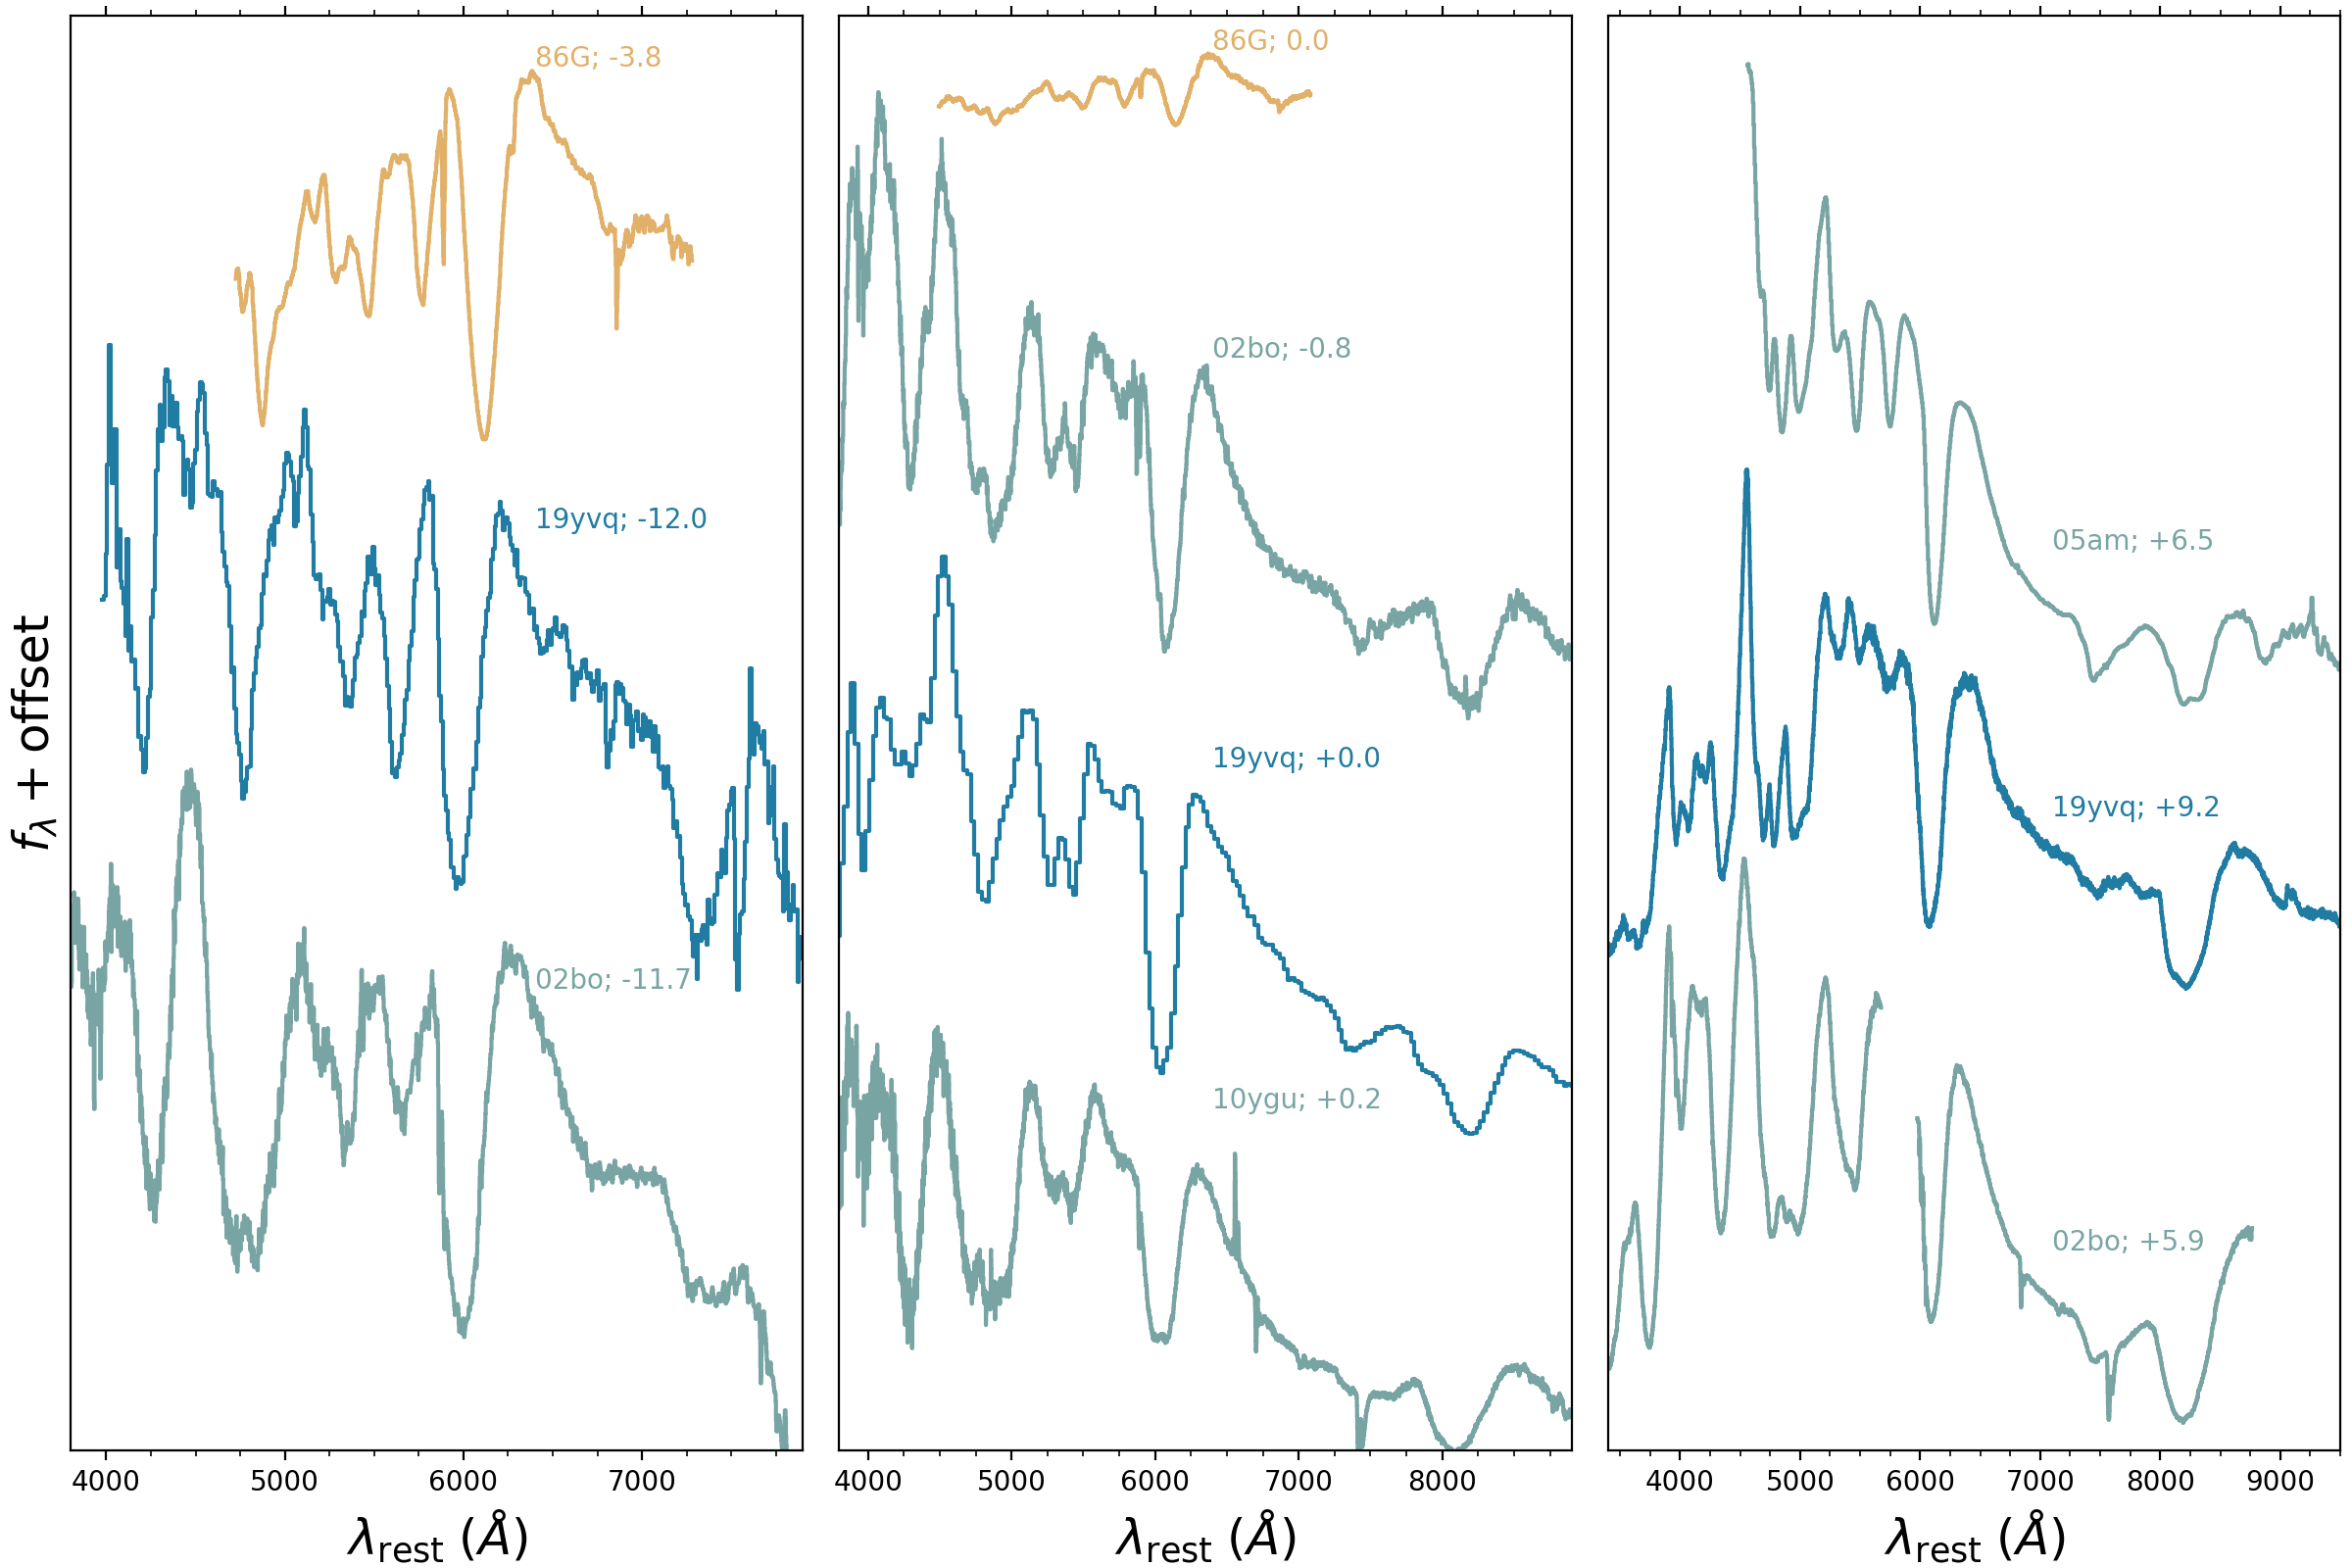

In [48]:
# PUT IT ALL TOGETHER
aam_colors = {'mustard': "#E29930",
             'blue': "#217CA3",
             'asphalt': "#32384D",
             'navy': "#444C5C",
             'punch': "#CE5A57",
             'ocean': "#78A5A3",
             'warm': "#E1B16A",}


fig, (ax1, ax2,  ax3) = plt.subplots(1, 3, figsize = (12,8))

#19yvq
spec = '../data/spectra/ZTF19adcecwu_20200103_LT_v1.ascii'
phase = -12.0

comp_dir = '../data/comp_sne/'
#02bo
spec_02bo = comp_dir + 'SN2002bo_2002-03-11_06-14-24_Lick-3m_KAST_BSNIP.flm' # Silverman+12
z_02bo = 0.00424
phase_02bo = (52344.260 - 52356.0)/(1+z_02bo)

#86G
spec_86G = comp_dir + '1986G_1986-05-07_04-48-00_ESO-1.5m_BC-ESO_SUSPECT.dat' # Cristiani+1992
z_86G = 0.0018
phase_86G = -3.8

spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)

wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
norm_flux = np.median(fl[np.where((wv > 6400) & (wv < 6550))])

ax1.plot(wv/(1+z), fl/norm_flux, color=aam_colors['blue'])
ax1.text(6400, 1.2, '19yvq; {:.1f}'.format(phase), color=aam_colors['blue'])

spec_02bo_df = pd.read_csv(spec_02bo, comment='#', delim_whitespace=True, header=None)
wv_02bo, fl_02bo = plot_box_spec(spec_02bo_df[0].values, spec_02bo_df[1].values)
norm_flux = np.median(fl_02bo[np.where((wv_02bo > 6400) & (wv_02bo < 6550))])
ax1.plot(wv_02bo/(1+z_02bo), fl_02bo/norm_flux - 0.8, color=aam_colors['ocean'])
ax1.text(6400, 0.3, '02bo; {:.1f}'.format(phase_02bo), color=aam_colors['ocean'])

spec_86G_df = pd.read_csv(spec_86G, comment='#', delim_whitespace=True, header=None)
wv_86G, fl_86G = plot_box_spec(spec_86G_df[0].values.astype(float), spec_86G_df[1].values)
norm_flux = np.median(fl_86G[np.where((wv_86G > 6400) & (wv_86G < 6550))])
plot_region = np.where(wv_86G > 3600)
ax1.plot(wv_86G[plot_region]/(1+z_86G), fl_86G[plot_region]/norm_flux + 1, color=aam_colors['warm'])
ax1.text(6400, 2.1, '86G; {:.1f}'.format(phase_86G), color=aam_colors['warm'])

ax1.set_xlim(3800,7900)
ax1.set_ylim(-0.6, 2.2)
ax1.set_ylabel(r'$f_\lambda + \mathrm{offset}$', fontsize=18)

#19yvq
spec = '../data/spectra/ZTF19adcecwu_20200115_P60_v1.ascii'
phase = 0.0

comp_dir = '../data/comp_sne/'
#02bo
spec_02bo = comp_dir + 'SN2002bo_2002-03-22_04-00-29_Lick-3m_KAST_BSNIP.flm'
z_02bo = 0.00424
phase_02bo = (52355.167 - 52356.0)/(1+z_02bo)

#10ygu
spec_10ygu = comp_dir + 'PTF10ygu_Gemini_phase_0.2.txt'
z_10ygu = 0.025047
phase_10ygu = 0.2

#86G
spec_86G = comp_dir + '1986G_1986-05-11_00-00-00_ESO-1.5m_BC-ESO_SUSPECT.dat' # Cristiani+1992
z_86G = 0.0018
phase_86G = 0.0

spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)

wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
norm_flux = np.median(fl[np.where((wv > 6400) & (wv < 6550))])
ax2.plot(wv/(1+z), fl/norm_flux, color=aam_colors['blue'])
ax2.text(6400, 1.2, '19yvq; +{:.1f}'.format(phase), color=aam_colors['blue'])

spec_02bo_df = pd.read_csv(spec_02bo, comment='#', delim_whitespace=True, header=None)
wv_02bo, fl_02bo = plot_box_spec(spec_02bo_df[0].values, spec_02bo_df[1].values)
norm_flux = np.median(fl_02bo[np.where((wv_02bo > 6400) & (wv_02bo < 6550))])
ax2.plot(wv_02bo/(1+z_02bo), fl_02bo/norm_flux + 1.2, color=aam_colors['ocean'])
ax2.text(6400, 2.4, '02bo; {:.1f}'.format(phase_02bo), color=aam_colors['ocean'])

spec_10ygu_df = pd.read_csv(spec_10ygu, comment='#', delim_whitespace=True, header=None)
wv_10ygu, fl_10ygu = plot_box_spec(spec_10ygu_df[0].values, spec_10ygu_df[1].values)
norm_flux = np.median(fl_10ygu[np.where((wv_10ygu > 6400) & (wv_10ygu < 6550))])
plot_region = np.where(wv_10ygu > 3600)
ax2.plot(wv_10ygu[plot_region]/(1+z_10ygu), fl_10ygu[plot_region]/norm_flux -1 , color=aam_colors['ocean'])
ax2.text(6400, 0.2, '10ygu; +{:.1f}'.format(phase_10ygu), color=aam_colors['ocean'])

spec_86G_df = pd.read_csv(spec_86G, comment='#', delim_whitespace=True, header=None)
wv_86G, fl_86G = plot_box_spec(spec_86G_df[0].values.astype(float), spec_86G_df[1].values)
norm_flux = np.median(fl_86G[np.where((wv_86G > 6400) & (wv_86G < 6550))])
plot_region = np.where(wv_86G > 4500)
ax2.plot(wv_86G[plot_region]/(1+z_86G), fl_86G[plot_region]/4e-13 + 3, color=aam_colors['warm'])
ax2.text(6400, 3.3, '86G; {:.1f}'.format(phase_86G), color=aam_colors['warm'])


ax2.set_xlim(3800,8900)
ax2.set_ylim(-0.8, 3.4)

#19yvq
spec = '../data/spectra/ZTF19adcecwu_20200124_Keck1_v1.ascii'
phase = 9.2

comp_dir = '../data/comp_sne/'
#02bo
spec_02bo = comp_dir + '2002bo_2002-03-28_00-00-00_WHT-4.2m_ISIS_SUSPECT.dat' # Benetti+04
z_02bo = 0.00424
phase_02bo = 5.9

#05am
spec_05am =  comp_dir + 'SN2005am_2005-03-13_05-21-07_Lick-3m_KAST_BSNIP.flm' # Silverman+12
z_05am = 0.007899
phase_05am = (53442.222 - 53435.645)/(1+z_05am)



spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)
wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
norm_flux = np.median(fl[np.where((wv > 6400) & (wv < 6550))])
ax3.plot(wv/(1+z), fl/norm_flux, color=aam_colors['blue'])
ax3.text(7100, 0.6, '19yvq; +{:.1f}'.format(phase), color=aam_colors['blue'])

spec_02bo_df = pd.read_csv(spec_02bo, comment='#', delim_whitespace=True, header=None)
wv_02bo, fl_02bo = plot_box_spec(spec_02bo_df[0].values, spec_02bo_df[1].values)
norm_flux = np.median(fl_02bo[np.where((wv_02bo > 6400) & (wv_02bo < 6550))])
plot_blue = np.where(wv_02bo < 5700)
ax3.plot(wv_02bo[plot_blue]/(1+z_02bo), fl_02bo[plot_blue]/norm_flux - 1.3, color=aam_colors['ocean'])
plot_red = np.where(wv_02bo > 6000)
ax3.plot(wv_02bo[plot_red]/(1+z_02bo), fl_02bo[plot_red]/norm_flux - 1.3, color=aam_colors['ocean'])
ax3.text(7100, -.7, '02bo; +{:.1f}'.format(phase_02bo), color=aam_colors['ocean'])

spec_05am_df = pd.read_csv(spec_05am, comment='#', delim_whitespace=True, header=None)
wv_05am, fl_05am = plot_box_spec(spec_05am_df[0].values, spec_05am_df[1].values)
norm_flux = np.median(fl_05am[np.where((wv_05am > 6400) & (wv_05am < 6550))])
plot_region = np.where(wv_05am > 3200)
ax3.plot(wv_05am[plot_region]/(1+z_05am), fl_05am[plot_region]/norm_flux +0.8, color=aam_colors['ocean'])
ax3.text(7100, 1.4, '05am; +{:.1f}'.format(phase_05am), color=aam_colors['ocean'])
ax3.set_xlim(3400,9500)
ax3.set_ylim(-1.3,3)

for ax in [ax1, ax2, ax3]:
    ax.set_xlabel(r'$\lambda_\mathrm{rest} \;  (\AA)$', fontsize=18)
    ax.set_yticks([])
    ax.tick_params(which='both', top=True)
    ax.xaxis.set_minor_locator(MultipleLocator(250))

fig.subplots_adjust(wspace=0.05,left=0.03,bottom=0.075,top=0.99,right=0.995)
fig.savefig('../paper/figures/spec_comp.pdf')

<IPython.core.display.Javascript object>


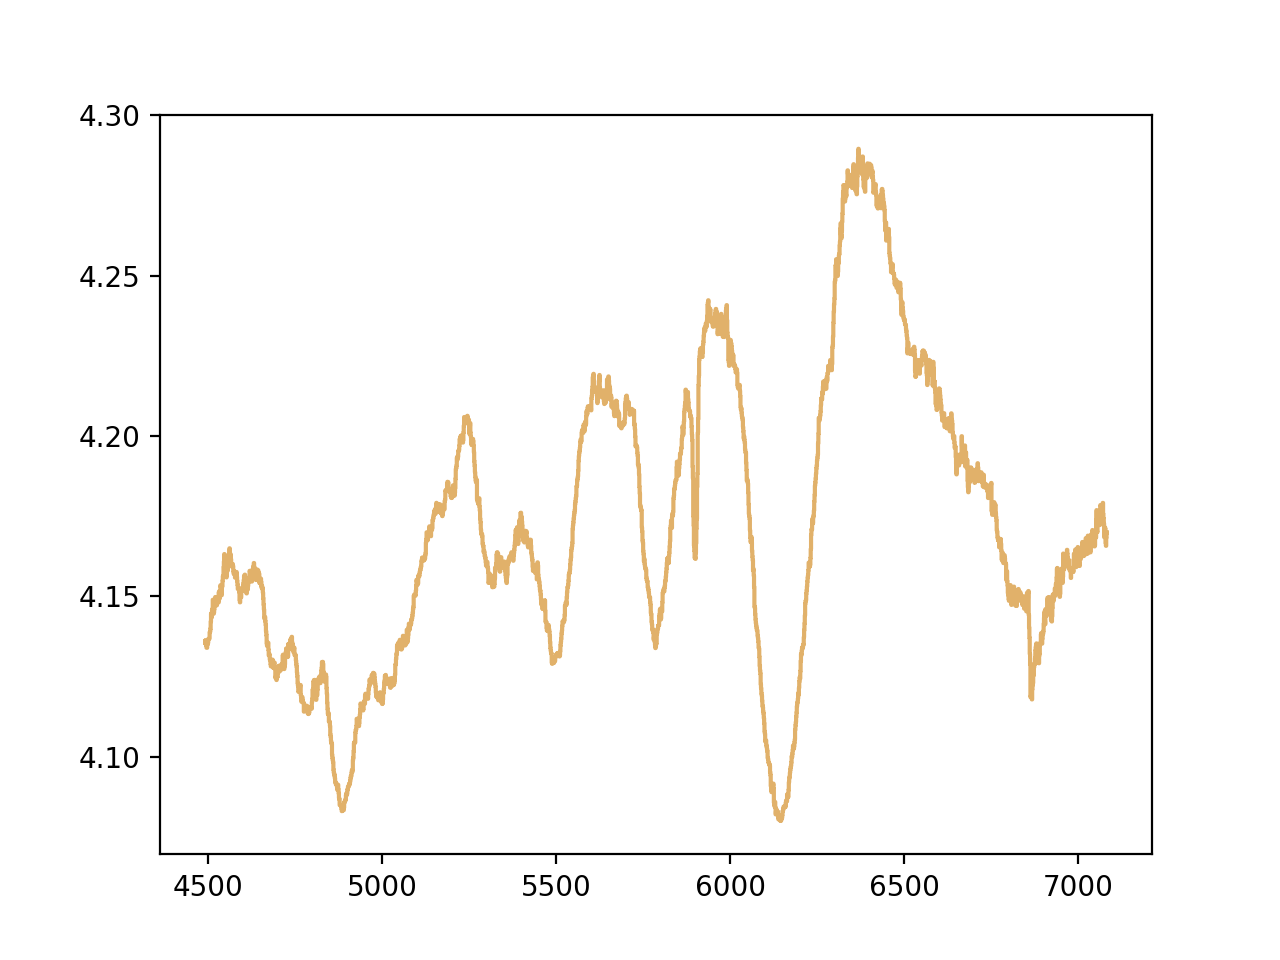

Text(6800, 5.6, '86G; 0.0')

In [28]:
fig,ax2 = plt.subplots()
spec_86G_df = pd.read_csv(spec_86G, comment='#', delim_whitespace=True, header=None)
wv_86G, fl_86G = plot_box_spec(spec_86G_df[0].values.astype(float), spec_86G_df[1].values)
norm_flux = np.median(fl_86G[np.where((wv_86G > 7200) & (wv_86G < 7400))])
plot_region = np.where(wv_86G > 4500)
ax2.plot(wv_86G[plot_region]/(1+z_86G), fl_86G[plot_region]/4e-13 + 4, color=aam_colors['warm'])
ax2.text(6800, 5.6, '86G; {:.1f}'.format(phase_86G), color=aam_colors['warm'])
